# Lesson 0 - Python Basics

We will use the [LxMLS lab guide](http://lxmls.it.pt/2018/LxMLS_guide_2018.pdf) here, from pages 4 to 29.

## 0.4.4 - Matplotlib

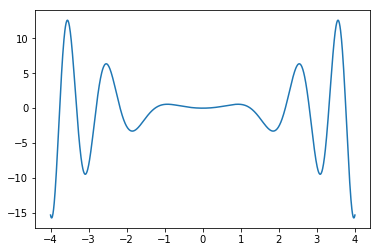

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-4, 4, 1000)
# linspace will return 1000 points, evenly spaced between -4 and 4

plt.plot(X, X**2*np.cos(X**2))
plt.savefig("044simple.pdf")

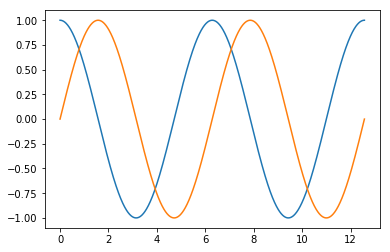

In [5]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0, 4*np.pi, 1000)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

In [15]:
import numpy as np

A = np.arange(100)

print(np.mean(A))
print(A.mean())

C = np.cos(A)
print(C.ptp())
np.ptp?

49.5
49.5
1.99996082639


In [19]:
a = np.array([[2, 3],[3, 4]])
b = np.array([[1, 1],[1, 1]])
a_dim1, a_dim2 = a.shape
b_dim1, b_dim2 = b.shape
c = np.zeros([a_dim1, b_dim2])

for i in range(a_dim1):
    for j in range(b_dim2):
        for k in range(a_dim2):
            c[i,j] += a[i,k]*b[j,k]

print(c)

d = np.dot(a, b)
print(d)

[[ 5.  5.]
 [ 7.  7.]]
[[5 5]
 [7 7]]
